In [ ]:
## Se cargan las librarias requeridas
import requests
import os
import urllib.request
from bs4 import BeautifulSoup

In [ ]:
## Pagina web
url = 'http://www.allitebooks.org/page/1/'

## Se obtiene el código html de la página
response = requests.get(url)

## Se imprime la respuesta. Un valor de
## <Response [200]> indica que fue correcta
## la apertura
response

<Response [200]>

In [ ]:
## Se procesa el código html
x = BeautifulSoup(response.text, "html.parser")

## Se buscan todas las componentes con tag a,
## es decir, aquellas que tienen
## <a href = .... >
x = x.findAll('a')

## En los tags que tienen libros aparece el atributo rel
## <a href="http://www.allitebooks.org/ ... "... rel='bookmark'>
x = [e  for e in x if 'rel' in e.attrs.keys()]

## el atributo href tiene la dirección de la página web
x = set(e['href']  for e in x if 'bookmark' in e['rel'] )

## Se imprimen las direcciones obtenidas y la cantidad
for a in x:
    print(repr(a))
len(x)

'http://www.allitebooks.org/c-for-lazy-programmers/'
'http://www.allitebooks.org/beginning-flutter/'
'http://www.allitebooks.org/beginning-anomaly-detection-using-python-based-deep-learning/'
'http://www.allitebooks.org/flutter-recipes/'
'http://www.allitebooks.org/lpic-1-linux-professional-institute-certification-practice-tests-2nd-edition/'
'http://www.allitebooks.org/asp-net-core-in-action/'
'http://www.allitebooks.org/professional-javascript-for-web-developers-4th-edition/'
'http://www.allitebooks.org/perl-6-quick-syntax-reference/'
'http://www.allitebooks.org/the-it-support-handbook/'
'http://www.allitebooks.org/pro-smartphone-cross-platform-development/'


10

In [ ]:
## Para cada dirección web se abre la págia y se extrae
## la dirección html del documento
for a in x:

    ## carga el contenido de la página
    response = requests.get(a)

    ## Se procesa el código html
    y = BeautifulSoup(response.text, "html.parser")

    ## Se obtienen los tags que tiene 'a'
    y = y.findAll('a')

    ## se filtran por los tag con attributo 'target'
    y = [e for e in y if 'target' in e.attrs.keys()]

    ## Si '_blank' aparece en target, el href tiene la
    ## dirección de descarga del libro
    y = set(e ['href'] for e in y if '_blank' in e['target'])

    ## Se descarga cada archivo r
    for b in y:
        cmd = "wget " + b
        os.system(cmd)

In [ ]:
#______________________________________________________________________
#Técnicas Estadísticas para Exploración de Datos
##
## Preparación
##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

In [ ]:
##
## Lectura del archivo.
##
df = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/iris.csv",
                 sep = ',',         # separador de campos
                 thousands = None,  # separador de miles para números
                 decimal = '.')     # separador de los decimales para números
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
##
## Se verifican los tipos de las columnas
##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
#P1.— ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?
df.mean()

Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

In [ ]:
df.groupby('Species').mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
df.median()

Sepal_Length    5.80
Sepal_Width     3.00
Petal_Length    4.35
Petal_Width     1.30
dtype: float64

In [ ]:
df.groupby('Species').median()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


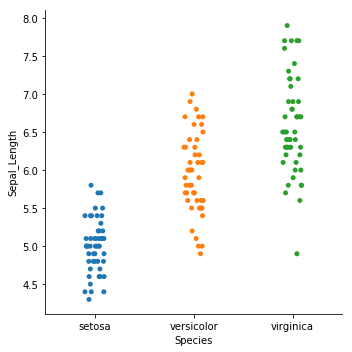

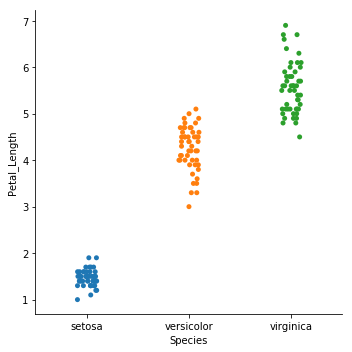

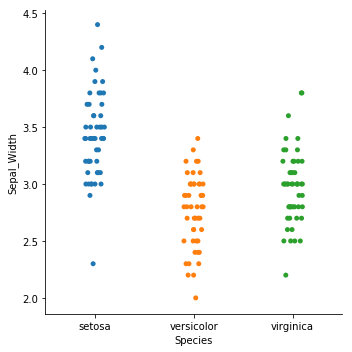

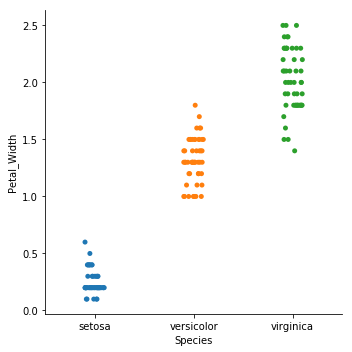

In [ ]:
#P2.— ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?
sns.catplot(x="Species", y="Sepal_Length", data=df)
sns.catplot(x="Species", y="Petal_Length", data=df)
sns.catplot(x="Species", y="Sepal_Width",  data=df)
sns.catplot(x="Species", y="Petal_Width",  data=df);

In [ ]:
df.max()

Sepal_Length          7.9
Sepal_Width           4.4
Petal_Length          6.9
Petal_Width           2.5
Species         virginica
dtype: object

In [ ]:
df.min()

Sepal_Length       4.3
Sepal_Width          2
Petal_Length         1
Petal_Width        0.1
Species         setosa
dtype: object

In [ ]:
df.groupby('Species').max()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [ ]:
df.groupby('Species').min()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [ ]:
##
## Computa el rango
##
df._get_numeric_data().max() - df._get_numeric_data().min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

In [ ]:
df.select_dtypes('number').max() - df.select_dtypes('number').min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

In [ ]:
df.var()


Sepal_Length    0.685694
Sepal_Width     0.189979
Petal_Length    3.116278
Petal_Width     0.581006
dtype: float64

In [ ]:
df.groupby('Species').var()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [ ]:
df.std()

Sepal_Length    0.828066
Sepal_Width     0.435866
Petal_Length    1.765298
Petal_Width     0.762238
dtype: float64

In [ ]:
df.groupby('Species').std()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [ ]:
df.mad()

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

In [ ]:
df.groupby('Species').mad()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.27072,0.28736,0.13152,0.08256
versicolor,0.42144,0.25480,0.37920,0.15712
virginica,0.50256,0.24216,0.44000,0.22808


In [ ]:
def madm(df):
    d = df._get_numeric_data().copy()
    m = d.median()
    for c in d.columns:
        d[c] = d[c] - m[c]
    return d.mad()
madm(df)

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

In [ ]:
df.quantile(0.25)

Sepal_Length    5.1
Sepal_Width     2.8
Petal_Length    1.6
Petal_Width     0.3
Name: 0.25, dtype: float64

In [ ]:
df.groupby('Species').quantile(0.25)

0.25,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [ ]:
df.quantile(0.75)

Sepal_Length    6.4
Sepal_Width     3.3
Petal_Length    5.1
Petal_Width     1.8
Name: 0.75, dtype: float64

In [ ]:
df.groupby('Species').quantile(0.75)

0.75,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [ ]:
df.quantile(0.75) - df.quantile(0.25)

Sepal_Length    1.3
Sepal_Width     0.5
Petal_Length    3.5
Petal_Width     1.5
dtype: float64

In [ ]:
df.groupby('Species').quantile(0.75) - df.groupby('Species').quantile(0.25)

0.75,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


In [ ]:
100 * df.std() / df.mean()

Sepal_Length    14.171126
Sepal_Width     14.256420
Petal_Length    46.974407
Petal_Width     63.555114
dtype: float64

In [ ]:
100 * df.groupby('Species').std() / df.groupby('Species').mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,7.041344,11.057887,11.878522,42.839670
versicolor,8.695606,11.328459,11.030774,14.913475
virginica,9.652089,10.843868,9.940466,13.556271


In [ ]:
df.groupby('Species')['Sepal_Length'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [ ]:
for x in df._get_numeric_data().columns:
    print(df.groupby('Species')[x].describe())
    print('')

            count   mean       std  min    25%  50%  75%  max
Species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

            count   mean       std  min    25%  50%    75%  max
Species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

            count   mean       std  min  25%   50%    75%  max
Species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

            count   mean       std  min  25%  50%  7

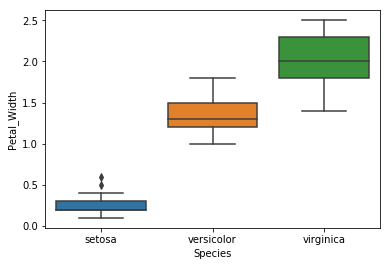

In [ ]:
sns.boxplot(x='Species', y='Petal_Width', data=df);

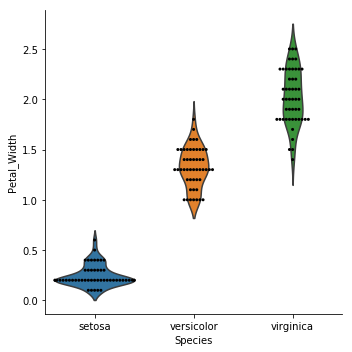

In [ ]:
g = sns.catplot(x="Species", y="Petal_Width", kind="violin", inner=None, data=df);
sns.swarmplot(x="Species", y="Petal_Width", color="k", size=3, data=df, ax=g.ax);

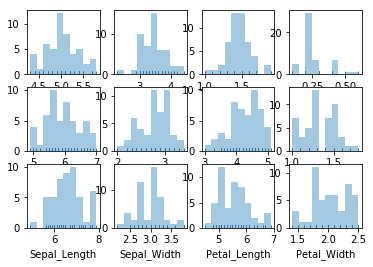

In [ ]:
for i,(key,group) in enumerate(df.groupby('Species')):
    for j,col in enumerate(df._get_numeric_data().columns):
        plt.subplot(3, 4, 4*i+j+1)
        sns.distplot(group[col], kde=False, bins=10, rug=True, hist_kws={'alpha': 0.4});

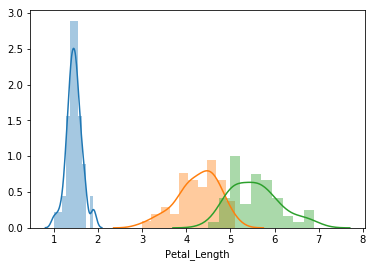

In [ ]:
for key,group in df.groupby('Species'):
    sns.distplot(group['Petal_Length'],  bins=10, hist_kws={'alpha': 0.4});

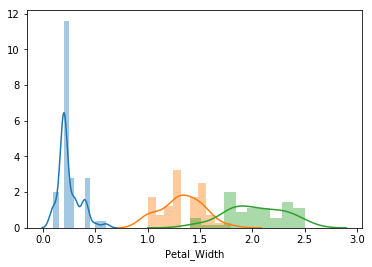

In [ ]:
for key,group in df.groupby('Species'):
    sns.distplot(group['Petal_Width'],  bins=10, hist_kws={'alpha': 0.4});

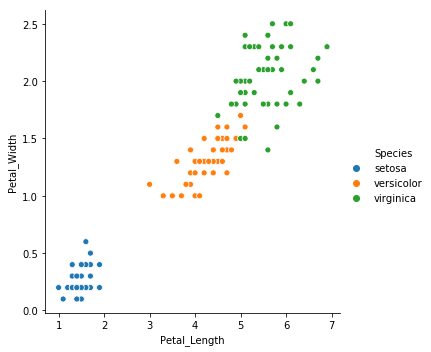

In [ ]:
#P3.— ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?
sns.relplot(x="Petal_Length", y="Petal_Width", hue="Species", data=df);

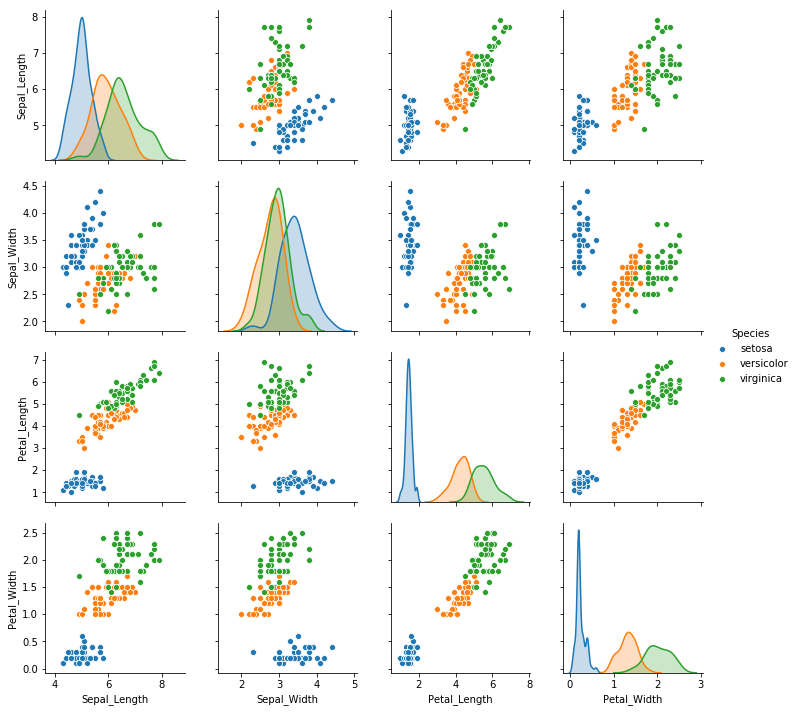

In [ ]:
sns.pairplot(df, hue="Species");

In [ ]:
%%R -i df
##
## se grafican las relaciones entre las variables anchos, largo y clase
##
pairs(df[,1:4], pch = 19)

In [ ]:
##
## Hexbin plot in seaborn
##
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


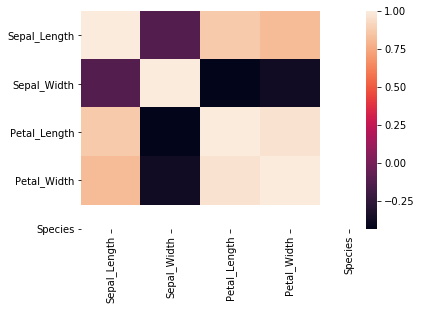

In [ ]:
sns.heatmap(df.corr(),
            xticklabels=df.columns.values,
            yticklabels=df.columns.values);